In [1]:
import os, re
import pandas as pd
import numpy as np
from wavescapes import Wavescape, apply_dft_to_pitch_class_matrix, complex_utm_to_ws_utm

def get_standard_filename(fname):
    fname_filter = r"(l\d{3}(?:-\d{2})?(?:_[a-z]+){1,2})"
    m = re.search(fname_filter, fname)
    if m is None:
        return
    return m.groups(0)[0]

def parse_interval_index(df, name='iv'):
    iv_regex = r"\[([0-9]*\.[0-9]+), ([0-9]*\.[0-9]+)\)"
    df = df.copy()
    values = df.index.str.extract(iv_regex).astype(float)
    iix = pd.IntervalIndex.from_arrays(values[0], values[1], closed='left', name=name)
    df.index = iix
    return df


Loading metadata

In [2]:
metadata = pd.read_csv('metadata.tsv', sep='\t', index_col=1)
fname2year = (metadata.composed_end + metadata.composed_start) / 2
fname2year

fnames
MIDIl087-03_images_quelques        NaN
l000_etude                      1915.0
l000_soirs                      1917.0
l009_danse                      1880.0
l066-01_arabesques-premiere     1888.0
l067_mazurka                    1890.0
l068_reverie                    1890.0
l069_tarentelle                 1890.0
l070_ballade                    1890.0
l071_valse                      1890.0
l082_nocturne                   1892.0
l087-01_images_lent             1894.0
l095-01_pour_prelude            1901.0
l095-02_pour_sarabande          1894.0
l095-03_pour_toccata            1901.0
l100-01_estampes_pagode         1903.0
l100-02_estampes_soiree         1903.0
l100-03_estampes_jardins        1903.0
l106_isle                       1904.0
l110-01_images_reflets          1904.0
l110-02_images_hommage          1904.0
l110-03_images_mouvement        1905.0
l111-02_images_lune             1907.0
l113-01_childrens_doctor        1907.0
l113-02_childrens_jimbos        1907.0
l113-03_childrens_

Loading TSV files each containing the Pitch Class Vectors (PCVs) for one piece. The resulting DataFrames have indices of type `pd.IntervalIndex`. 

In [3]:
pcv_dir = './pcvs'
pcv_files = sorted(os.listdir(pcv_dir))
pcv_dfs = {get_standard_filename(fname): pd.read_csv(os.path.join(pcv_dir, fname), sep='\t', index_col=0) for fname in pcv_files}
pcv_dfs = {k: parse_interval_index(v).fillna(0.0) for k, v in pcv_dfs.items()}
pcv_dfs['l000_etude'].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
iv,,,,,,,,,,,,
"[0.0, 1.0)",0.083417,0.0,0.0,0.166833,0.0,0.000000,0.0,0.0,0.666334,0.0,0.083417,0.0
"[1.0, 2.0)",0.083417,0.0,0.0,0.166833,0.0,0.166833,0.0,0.0,0.582917,0.0,0.000000,0.0
"[2.0, 3.0)",0.166667,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.166667,0.0,0.000000,0.0
"[3.0, 4.0)",0.166667,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,0.166667,0.0,0.000000,0.0
"[4.0, 5.0)",0.083417,0.0,0.0,0.166833,0.0,0.166833,0.0,0.0,0.582917,0.0,0.000000,0.0
"[5.0, 6.0)",0.083417,0.0,0.0,0.166833,0.0,0.166833,0.0,0.0,0.582917,0.0,0.000000,0.0
"[6.0, 7.0)",0.083417,0.0,0.0,0.166833,0.0,0.166833,0.0,0.0,0.582917,0.0,0.000000,0.0
"[7.0, 8.0)",0.071464,0.0,0.0,0.142929,0.0,0.214393,0.0,0.0,0.571214,0.0,0.000000,0.0
"[8.0, 9.0)",0.083417,0.0,0.0,0.166833,0.0,0.000000,0.0,0.0,0.666334,0.0,0.083417,0.0


Apply Discrete Fourier Transform (DFT) to each and store the results in `dfts`:

In [4]:
dfts = {k: apply_dft_to_pitch_class_matrix(v.to_numpy()) for k, v in pcv_dfs.items()}
{k: v.shape for k, v in dfts.items()}

{'l087-03_images_quelques': (679, 679, 7),
 'l000_etude': (284, 284, 7),
 'l000_soirs': (89, 89, 7),
 'l009_danse': (182, 182, 7),
 'l066-01_arabesques': (423, 423, 7),
 'l067_mazurka': (411, 411, 7),
 'l068_reverie': (403, 403, 7),
 'l069_tarentelle': (995, 995, 7),
 'l070_ballade': (420, 420, 7),
 'l071_valse': (451, 451, 7),
 'l082_nocturne': (352, 352, 7),
 'l087-01_images_lent': (172, 172, 7),
 'l095-01_pour_prelude': (535, 535, 7),
 'l095-02_pour_sarabande': (216, 216, 7),
 'l095-03_pour_toccata': (530, 530, 7),
 'l100-01_estampes_pagode': (388, 388, 6),
 'l100-02_estampes_soiree': (279, 279, 7),
 'l100-03_estampes_jardins': (628, 628, 7),
 'l106_isle': (458, 458, 7),
 'l110-01_images_reflets': (190, 190, 7),
 'l110-02_images_hommage': (445, 445, 7),
 'l110-03_images_mouvement': (353, 353, 7),
 'l111-02_images_lune': (227, 227, 7),
 'l113-01_childrens_doctor': (298, 298, 7),
 'l113-02_childrens_jimbos': (320, 320, 7),
 'l113-03_childrens_serenade': (354, 354, 7),
 'l113-05_childr

Minimal example for drawing a wavescape

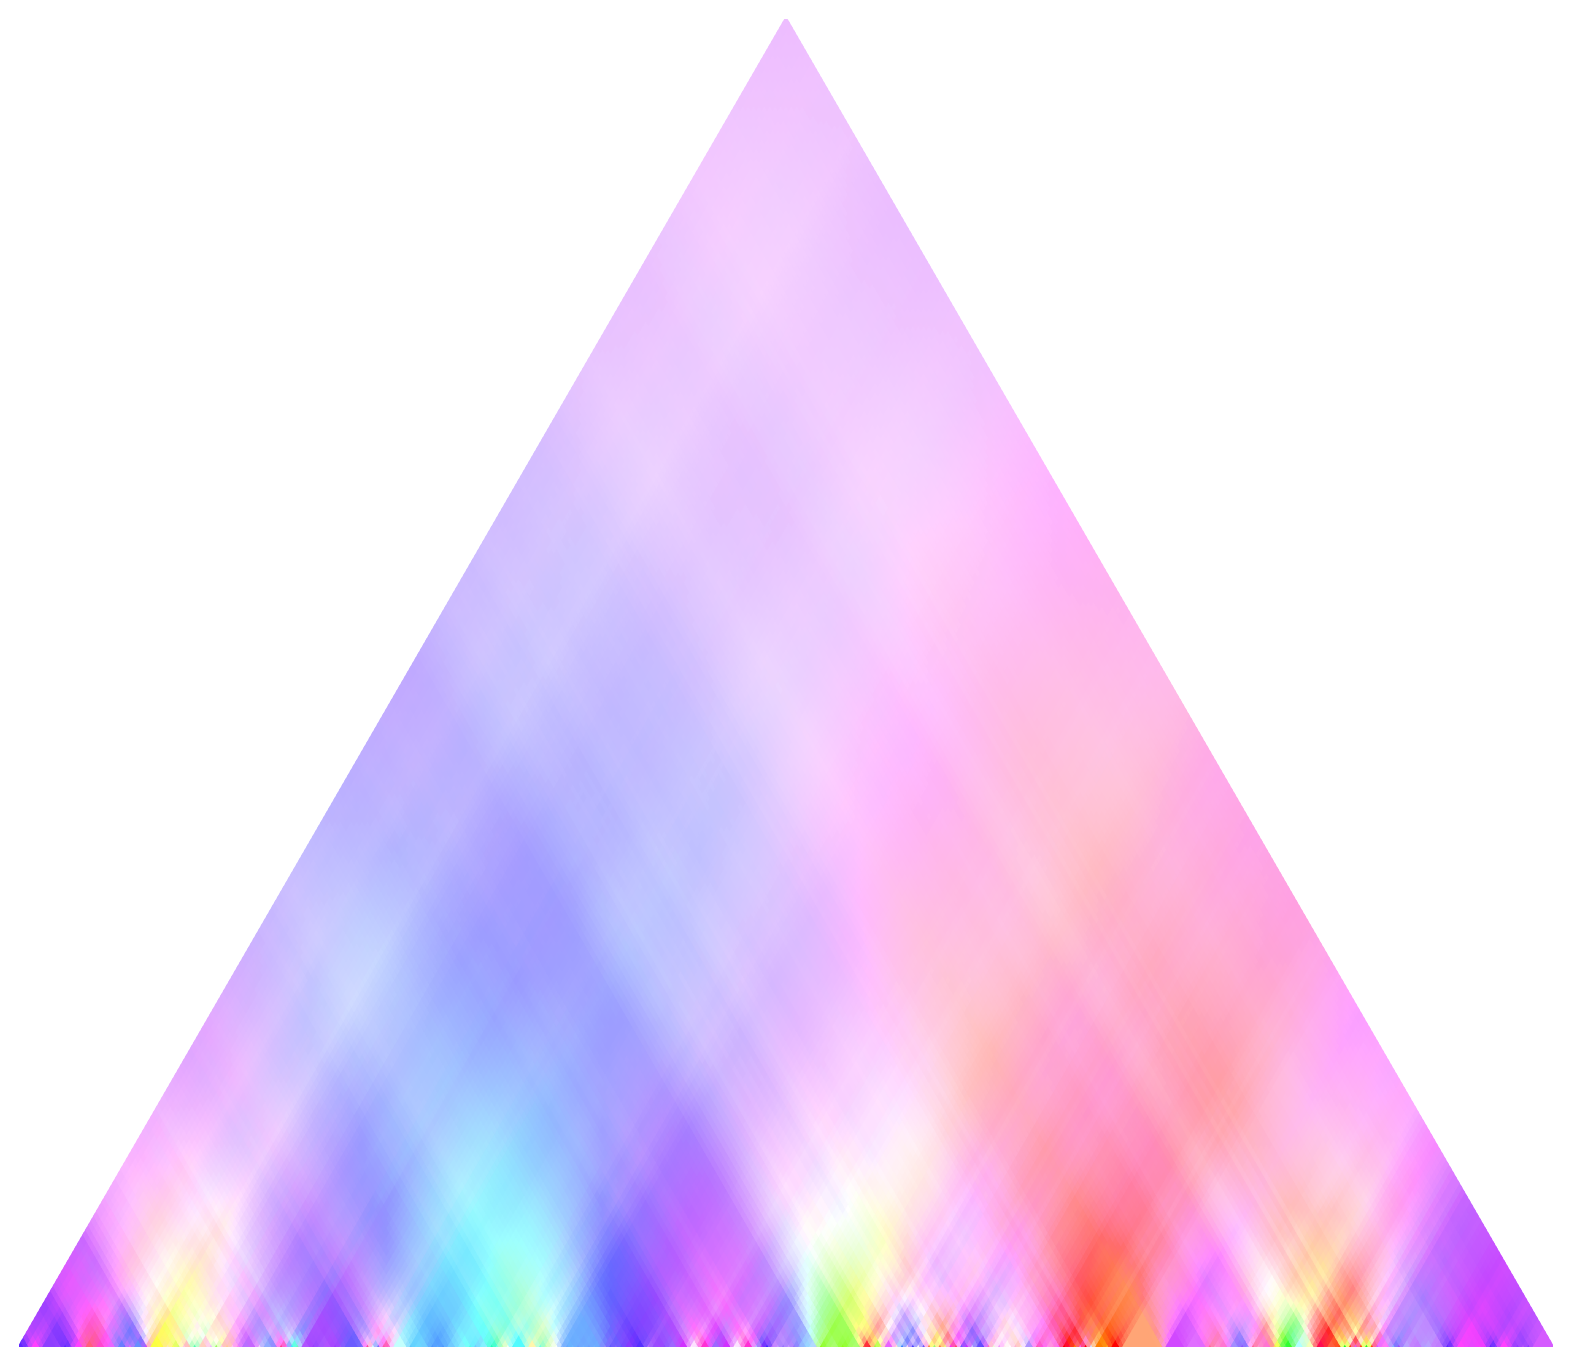

In [5]:
piece = 'l000_etude'
coeff = 5
ws = Wavescape(complex_utm_to_ws_utm(dfts[piece], coeff=coeff), width=800)
ws.draw()